In [2]:
import xarray as xr
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from ens_util import *
plt.rcParams['figure.figsize'] = [9, 9]

In [20]:
data_files = glob('data_crop*.nc')
res_files = glob('2014*Z_crs.nc')
coordx = [258,260,262,264]
coordy = [63,65,67,69]
data = build_datadf(data_files,coordx,coordy)
(avg15_low,std15_low,avg30_low,std30_low,avg45_low,std45_low,avg60_low,
 std60_low) = build_statdf(res_files,data.index,data.columns,coordx,coordy,
                           ci_max=0.1)
(avg15_med,std15_med,avg30_med,std30_med,avg45_med,std45_med,avg60_med,
 std60_med) = build_statdf(res_files,data.index,data.columns,coordx,coordy,
                           ci_min=0.1,ci_max=0.3)
(avg15_hi,std15_hi,avg30_hi,std30_hi,avg45_hi,std45_hi,avg60_hi,
 std60_hi) = build_statdf(res_files,data.index,data.columns,coordx,coordy,
                          ci_min=0.3)

In [61]:
err15_low = (avg15_low-data).abs()
err30_low = (avg30_low-data).abs()
err45_low = (avg45_low-data).abs()
err60_low = (avg60_low-data).abs()

err15_med = (avg15_med-data).abs()
err30_med = (avg30_med-data).abs()
err45_med = (avg45_med-data).abs()
err60_med = (avg60_med-data).abs()

err15_hi = (avg15_hi-data).abs()
err30_hi = (avg30_hi-data).abs()
err45_hi = (avg45_hi-data).abs()
err60_hi = (avg60_hi-data).abs()

e = err15_med[0].values
s = std15_med[0].values
count = 0
# Problem!
for i in range(len(e)):
    if(pd.notnull(e[i])):# and pd.notnull(s[i])):
        count+=1
print(count)

#print("low = ",len(err15_low[0].values))
#print("med = ",len(err15_med))
#print("hi = ",len(err15_hi))

187


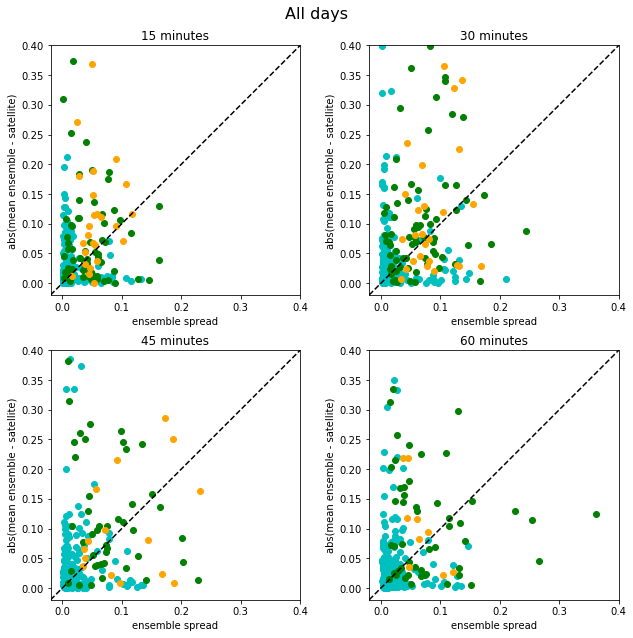

In [62]:
coord = 0
xmin = -0.02
ymin = xmin
xmax = 0.4
ymax = xmax
x = [xmin,xmax]
y = [ymin,ymax]
rows = 2; cols = 2;
fig,axarr = plt.subplots(rows,cols) 
for r in range(rows):
    for c in range(cols):
        axarr[r,c].set_aspect('equal','box')
        axarr[r,c].axis([xmin,xmax,ymin,ymax])
        axarr[r,c].plot(x,y,c='k',ls='--')
        axarr[r,c].set_xlabel("ensemble spread")
        axarr[r,c].set_ylabel("abs(mean ensemble - satellite)")

axarr[0,0].scatter(std15_low[coord].values,err15_low[coord].values,c='c')
axarr[0,1].scatter(std30_low[coord].values,err30_low[coord].values,c='c')
axarr[1,0].scatter(std45_low[coord].values,err45_low[coord].values,c='c')
axarr[1,1].scatter(std60_low[coord].values,err60_low[coord].values,c='c')

axarr[0,0].scatter(std15_med[coord].values,err15_med[coord].values,c='g')
axarr[0,1].scatter(std30_med[coord].values,err30_med[coord].values,c='g')
axarr[1,0].scatter(std45_med[coord].values,err45_med[coord].values,c='g')
axarr[1,1].scatter(std60_med[coord].values,err60_med[coord].values,c='g')

axarr[0,0].scatter(std15_hi[coord].values,err15_hi[coord].values,c='orange')
axarr[0,1].scatter(std30_hi[coord].values,err30_hi[coord].values,c='orange')
axarr[1,0].scatter(std45_hi[coord].values,err45_hi[coord].values,c='orange')
axarr[1,1].scatter(std60_hi[coord].values,err60_hi[coord].values,c='orange')

axarr[0,0].set_title("15 minutes")
axarr[0,1].set_title("30 minutes")
axarr[1,0].set_title("45 minutes")
axarr[1,1].set_title("60 minutes")

fig.tight_layout()
fig.suptitle("All days",fontsize=16)
fig.subplots_adjust(top=0.92)
plt.show()